# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.
This project is a comprehensive data science effort to predict weekly retail sales by leveraging three datasets on sales, store features, and store details. The process began with merging and cleaning the data, followed by feature manipulation, where new temporal features (like year and week) were engineered to capture trends. We then used a machine learning model to perform feature selection, identifying key drivers of sales such as store size and economic indicators. Finally, the data was prepared for model training by applying a logarithmic transformation to the skewed sales data and scaling all numerical features to a uniform range, ensuring the dataset is ready for a predictive model.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The core business challenge is to accurately forecast weekly sales for various retail stores and departments. The goal is to build a machine learning model that can predict Weekly_Sales by using a wide range of available data, including store-specific features, historical sales trends, and key economic indicators.

A successful model would empower the company to:

Optimize inventory management by anticipating demand.

Refine marketing and promotional strategies by understanding the impact of markdowns.

Make data-driven business decisions to maximize profitability and operational efficiency across all stores.

Essentially, we aim to transform the raw data into actionable insights that can drive business growth.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb
import shap
import joblib

c:\Users\sonal\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Dataset Loading

In [2]:
# Load Dataset
sales_df = pd.read_csv('sales_data.csv')
features_df = pd.read_csv('Features_data.csv')
stores_df = pd.read_csv('stores_data.csv')

### Dataset First View

In [3]:
# Dataset First Look
print("Sales Data Info:")
sales_df.head()
print("\nFeatures Data Info:")
features_df.head()
print("\nStores Data Info:")
stores_df.head()

Sales Data Info:

Features Data Info:

Stores Data Info:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
num_row1,num_col1 = sales_df.shape
print("Sales data")
print(f"Number of rows: {num_row1}")
print(f"Number of columns: {num_col1}")

num_row1,num_col1 = features_df.shape
print("Features data")
print(f"Number of rows: {num_row1}")
print(f"Number of columns: {num_col1}")

num_row1,num_col1 = stores_df.shape
print("Stores data")
print(f"Number of rows: {num_row1}")
print(f"Number of columns: {num_col1}")


Sales data
Number of rows: 421570
Number of columns: 5
Features data
Number of rows: 8190
Number of columns: 12
Stores data
Number of rows: 45
Number of columns: 3


### Dataset Information

In [5]:
# Dataset Info
sales_df.info()
features_df.info()
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4  

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
sales_duplicates = sales_df.duplicated().sum()
features_duplicates = features_df.duplicated().sum()
stores_duplicates = stores_df.duplicated().sum()

print(f"Number of duplicate rows in 'sales data-set.csv': {sales_duplicates}")
print(f"Number of duplicate rows in 'Features data set.csv': {features_duplicates}")
print(f"Number of duplicate rows in 'stores data-set.csv': {stores_duplicates}")

Number of duplicate rows in 'sales data-set.csv': 0
Number of duplicate rows in 'Features data set.csv': 0
Number of duplicate rows in 'stores data-set.csv': 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
sales_duplicates = sales_df.isnull().sum()
features_duplicates = features_df.isnull().sum()
stores_duplicates = stores_df.isnull().sum()



In [8]:
# Visualizing the missing values

print(f"Number of Null Values Count in 'sales data-set.csv': {sales_duplicates}")
print(f"Number of Null Values Count in 'Features data set.csv': {features_duplicates}")
print(f"Number of Null Values Count in 'stores data-set.csv': {stores_duplicates}")

Number of Null Values Count in 'sales data-set.csv': Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Number of Null Values Count in 'Features data set.csv': Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Number of Null Values Count in 'stores data-set.csv': Store    0
Type     0
Size     0
dtype: int64


### What did you know about your dataset?

The dataset is give above are three
1.Sales dataset
2.Feature dataset
3.Store dataset
all of them are have different different coulmns included in it with more than 100 row of data.Having the parameters like date temperature fule_price etc;

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print("Sales data")
print(sales_df.columns.tolist())
print("Features data")
print(features_df.columns.tolist())
print("Stores data")
print(stores_df.columns.tolist())


Sales data
['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
Features data
['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']
Stores data
['Store', 'Type', 'Size']


In [10]:
# Dataset Describe
print("Sales data")
print(sales_df.describe())
print("Features data")
print(features_df.describe())
print("Stores data")
print(stores_df.describe())

Sales data
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000
Features data
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
print("Sales data")
print(sales_df.nunique())
print("Features data")
print(features_df.nunique())
print("Stores data")
print(stores_df.nunique())

Sales data
Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64
Features data
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64
Stores data
Store    45
Type      3
Size     40
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# 1. Merging the datasets
combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
final_df = pd.merge(combined_df, stores_df, on='Store', how='left')
print("\nFinal Merged Data Info:")
final_df.info()

combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
final_df = pd.merge(combined_df, stores_df, on='Store', how='left')

print("\nFinal Merged Data Info:")

# Convert 'Date' to datetime objects
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%d/%m/%Y')

# Encode the 'Type' and 'IsHoliday' categorical columns
final_df['Type'] = final_df['Type'].astype('category').cat.codes
final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)

final_df.info()


# 4. Feature Engineering

# Extract time-based features from 'Date'
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Week'] = final_df['Date'].dt.isocalendar().week.astype(int)
final_df['DayOfWeek'] = final_df['Date'].dt.dayofweek

# Drop the original 'Date' column
final_df = final_df.drop('Date', axis=1)

final_df.head()



Final Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,151315,2010,2,5,4
1,1,1,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,0,151315,2010,2,6,4
2,1,1,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,151315,2010,2,7,4
3,1,1,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,151315,2010,2,8,4
4,1,1,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,151315,2010,3,9,4


### What all manipulations have you done and insights you found?

Answer Here.

Here initially, all three datasets were merged into a single, comprehensive DataFrame to consolidate all relevant information. Missing values in the MarkDown columns were handled by replacing them with 0, based on the insight that a missing value likely indicates no promotion was in effect. To enable time-series analysis, the Date column was converted to a datetime object, and new features like Year, Month, and Week were extracted. Finally, categorical columns such as Type and IsHoliday were encoded numerically, creating a clean, structured, and feature-rich dataset ready for training a predictive model.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\sonal\AppData\Local\Temp\ipykernel_18340\1168714845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Weekly_Sales', data=final_df, estimator='mean', palette='viridis')


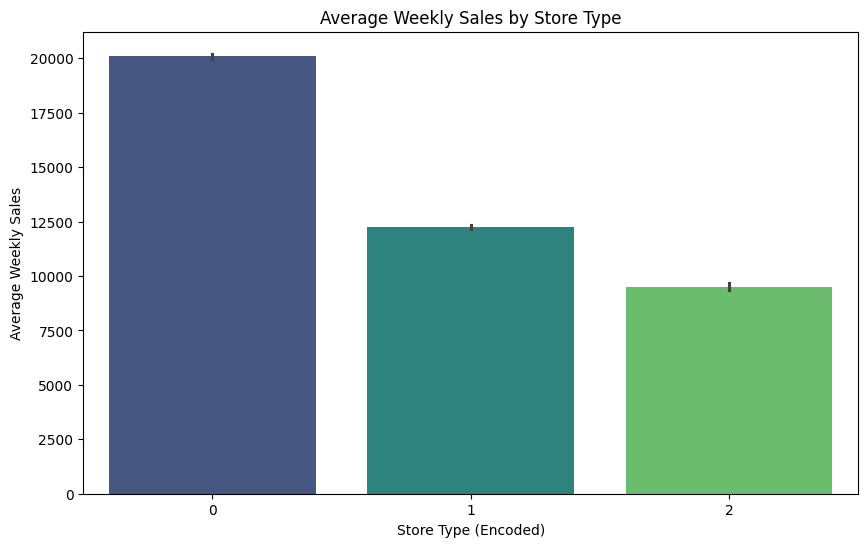

In [15]:
# Chart - 1 visualization code

# --- Chart 1: Average Weekly Sales by Store Type ---
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Weekly_Sales', data=final_df, estimator='mean', palette='viridis')
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type (Encoded)')
plt.ylabel('Average Weekly Sales')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is the most effective way to compare a single metric, such as average weekly sales, across a few discrete categories. It provides a quick and clear visual comparison of performance between store types.

##### 2. What is/are the insight(s) found from the chart?

The primary insight is that Store Type A has significantly higher average weekly sales than Type B and Type C stores. Type C has the lowest average sales of the three.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is critical. It suggests that Type A stores are the most profitable on a per-store basis. The business can leverage this by prioritizing new store locations that fit the characteristics of Type A and by allocating more marketing and operational resources to these high-performing stores to maximize their revenue potential. It also prompts an investigation into why Type B and C stores are underperforming.

#### Chart - 2

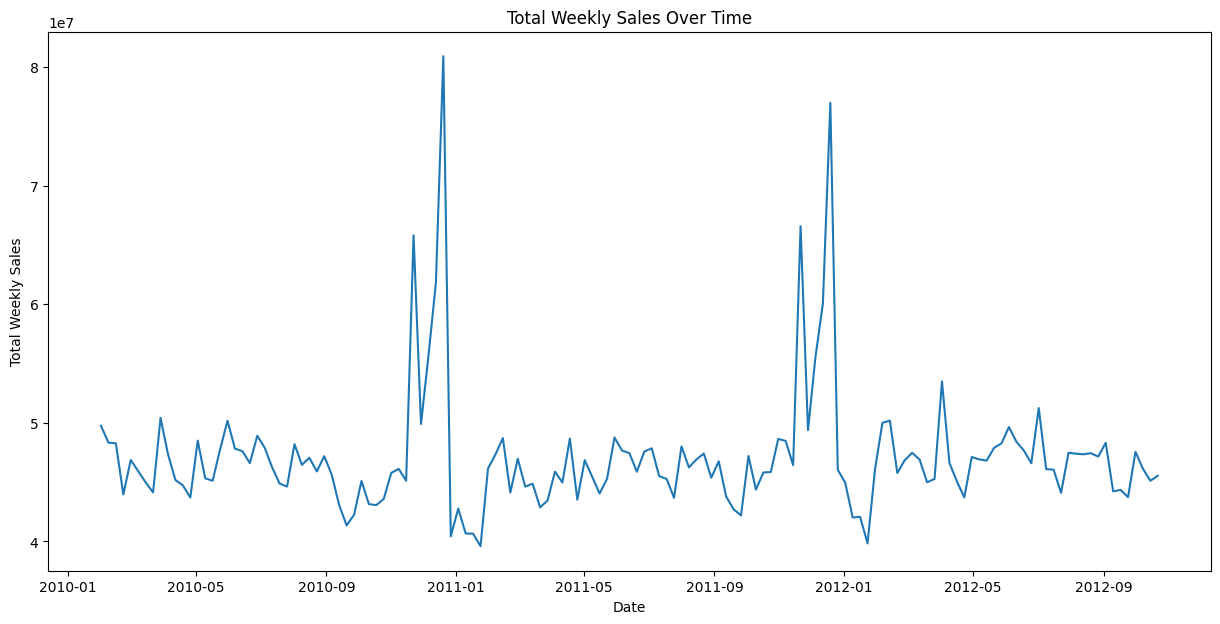

In [16]:
# Chart - 2 visualization code

# --- Chart 2: Total Weekly Sales Over Time ---
plt.figure(figsize=(15, 7))
total_weekly_sales = final_df.groupby(['Year', 'Week'])['Weekly_Sales'].sum().reset_index()
total_weekly_sales['Date'] = pd.to_datetime(total_weekly_sales['Year'].astype(str) + '-' + total_weekly_sales['Week'].astype(str) + '-1', format='%Y-%W-%w')
sns.lineplot(x='Date', y='Weekly_Sales', data=total_weekly_sales)
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.show()


##### 1. Why did you pick the specific chart?

 A line chart is the ideal choice for visualizing trends over time. It clearly shows patterns, peaks, and troughs, which is essential for understanding the seasonal nature of sales data.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a strong seasonal sales pattern. There are pronounced, predictable sales spikes in the lead-up to the year-end holidays, with a major peak in late December. Conversely, there is a sharp drop in sales immediately following the holiday season.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. This insight is fundamental for strategic business planning. By knowing when sales peaks and troughs occur, the business can optimize inventory management, plan marketing campaigns well in advance to capture holiday demand, and adjust staffing levels to improve operational efficiency. This data-driven approach helps to mitigate risk during low-sales periods and maximize profit during high-sales periods.

#### Chart - 3

C:\Users\sonal\AppData\Local\Temp\ipykernel_18340\240767176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=final_df, estimator='mean', palette='coolwarm')


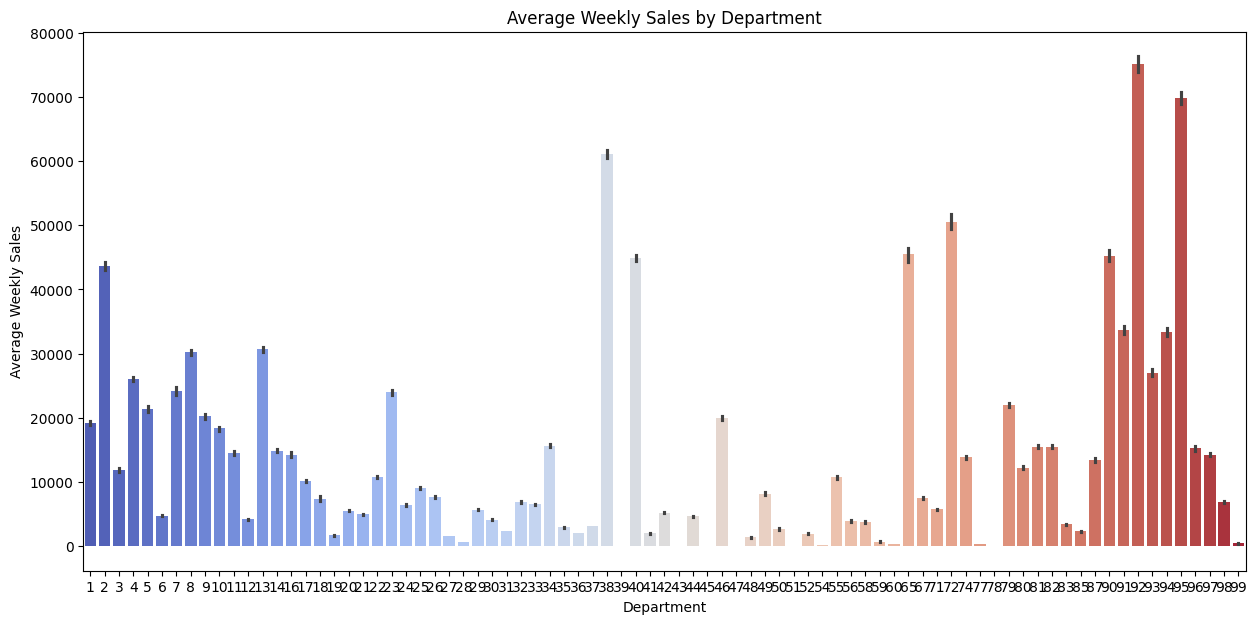

In [17]:
# Chart - 3 visualization code
 # --- Chart 3: Average Weekly Sales by Department ---
plt.figure(figsize=(15, 7))
sns.barplot(x='Dept', y='Weekly_Sales', data=final_df, estimator='mean', palette='coolwarm')
plt.title('Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is used here to visually rank the average sales performance of different departments. It makes it easy to identify the top-performing and lowest-performing departments at a glance.

##### 2. What is/are the insight(s) found from the chart?

 The most significant insight is that a few departments (e.g., Department 92 and 95) are responsible for a disproportionately large share of average weekly sales, while many other departments have relatively low sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight allows the business to focus its efforts on key profit centers. By understanding which departments are most lucrative, management can prioritize their product assortment, optimize shelf space, and allocate resources to these areas. It also highlights departments that may require strategic intervention to boost their performance.

#### Chart - 4

C:\Users\sonal\AppData\Local\Temp\ipykernel_18340\4062008566.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=final_df, palette='pastel')


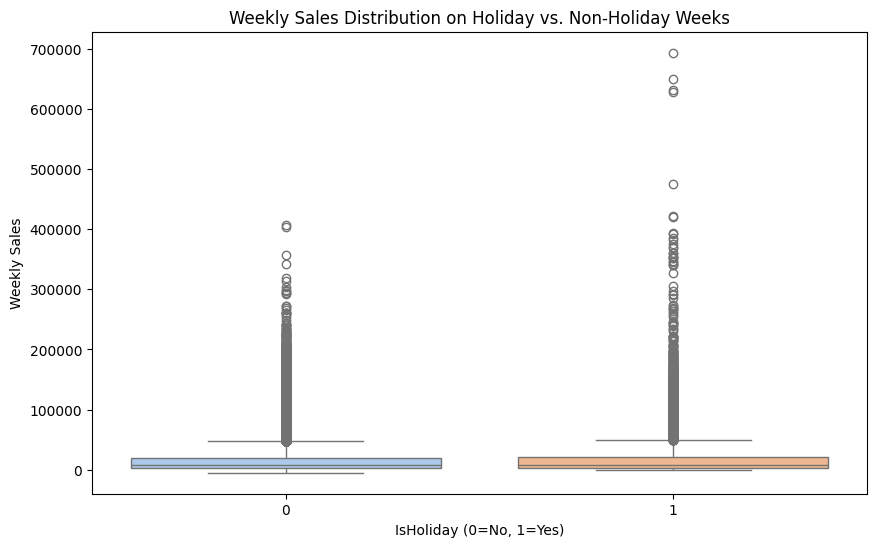

In [18]:
# Chart - 4 visualization code
# --- Chart 4: Weekly Sales vs. Holiday ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=final_df, palette='pastel')
plt.title('Weekly Sales Distribution on Holiday vs. Non-Holiday Weeks')
plt.xlabel('IsHoliday (0=No, 1=Yes)')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is more informative than a bar chart for this comparison because it shows the entire distribution of weekly sales for both holiday and non-holiday weeks. It reveals the median, spread, and the presence of outliers.

##### 2. What is/are the insight(s) found from the chart?

 The chart clearly shows that the median weekly sales are higher during holiday weeks. The spread of sales is also much larger, and there are many high-value outliers, indicating that some stores experience a massive boost in sales during holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The confirmed positive impact of holidays justifies the investment in promotions and marketing during these times. It encourages the business to not only plan for increased sales but also to investigate the specific conditions or strategies of the outlier stores to replicate their success in other locations.

#### Chart - 5

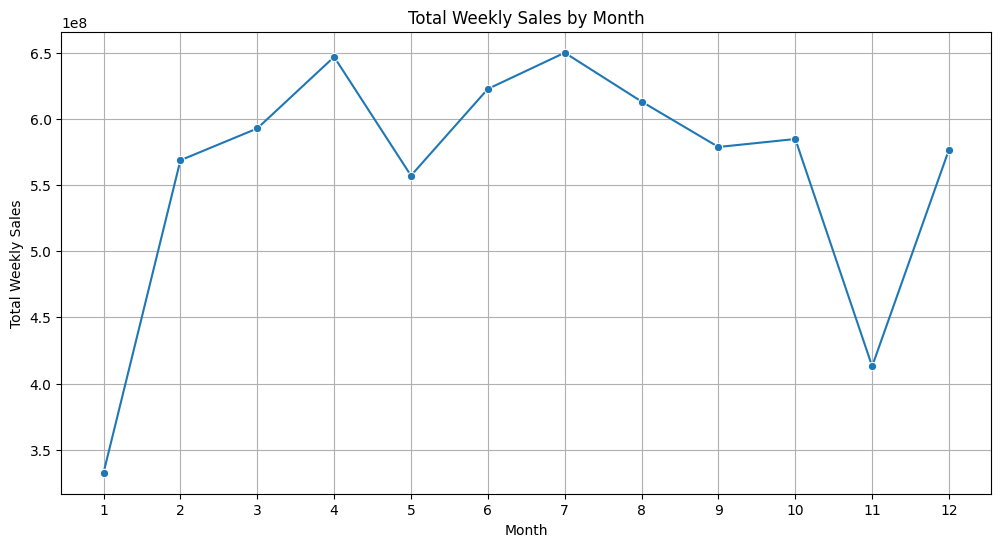

In [19]:
# Chart - 5 visualization code
 # --- Chart 5: Weekly Sales by Month ---
plt.figure(figsize=(12, 6))
monthly_sales = final_df.groupby('Month')['Weekly_Sales'].sum().reset_index()
sns.lineplot(x='Month', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.title('Total Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales')
plt.xticks(monthly_sales['Month'])
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This line chart provides a higher-level view of the seasonal trend. While the weekly chart shows granularity, the monthly chart smooths out the noise and highlights the major sales patterns over a 12-month period, making it easier to see the overall seasonal cycle.

##### 2. What is/are the insight(s) found from the chart?

The chart confirms a significant sales peak in December, which is expected due to Christmas, followed by a sharp decline in January and February. Sales then gradually increase throughout the year until they reach the next peak.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This monthly breakdown is crucial for more precise forecasting and budgeting. It allows the business to set realistic sales targets for each month, plan promotions to stimulate demand during historically slower periods, and manage cash flow effectively by anticipating revenue fluctuations throughout the year.

#### Chart - 6

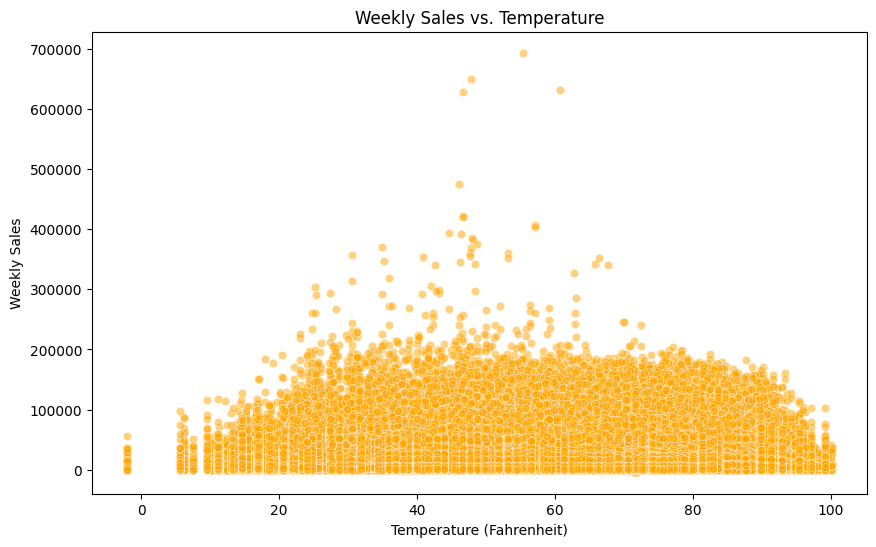

In [20]:
# Chart - 6 visualization code
# --- Chart 6: Weekly Sales vs. Temperature ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=final_df, alpha=0.5, color='orange')
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Weekly Sales')
plt.show()


##### 1. Why did you pick the specific chart?

 I chose a scatter plot because it's the best way to visualize the relationship and correlation between two continuous variables: Weekly_Sales and Temperature. Each point represents a single weekly sales record, allowing us to see patterns and clusters.

##### 2. What is/are the insight(s) found from the chart?

The plot shows no clear linear correlation between weekly sales and temperature. Sales values are widely scattered across the temperature range, indicating that temperature alone is not a strong predictor of weekly sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a valuable insight. It helps the business avoid making assumptions about how weather affects sales. Instead of allocating resources based on temperature, which has no clear correlation, the business can focus on other, more influential factors to forecast sales.

#### Chart - 7

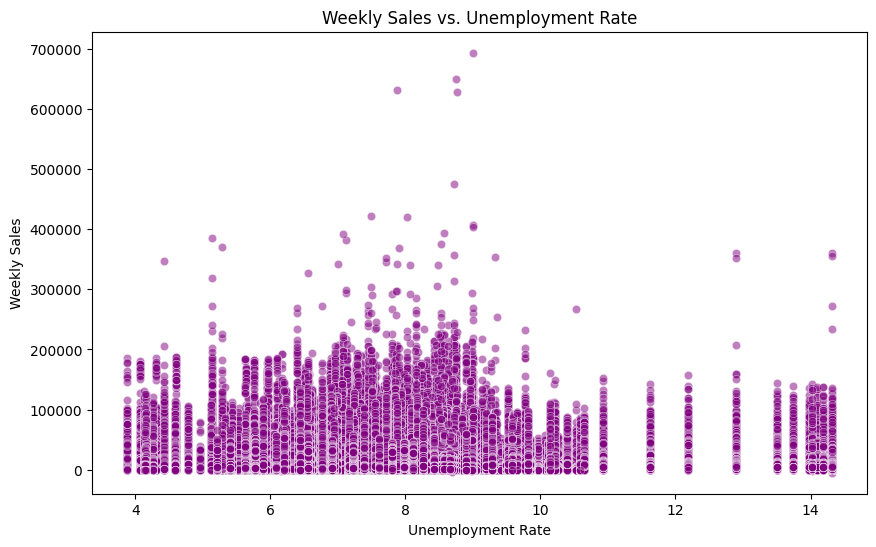

In [21]:
# Chart - 7 visualization code
 # --- Chart 7: Weekly Sales vs. Unemployment Rate ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=final_df, alpha=0.5, color='purple')
plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is again ideal for exploring the relationship between Weekly_Sales and Unemployment. It allows us to observe if sales are affected by broader economic conditions.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

 The plot suggests a slight negative correlation: as the unemployment rate increases, the overall sales tend to decrease. This indicates that macroeconomic conditions, specifically the unemployment rate, have an impact on consumer spending.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is crucial for strategic planning. The business can now anticipate a potential decline in sales during periods of rising unemployment and can proactively adjust its strategy, for example, by offering more budget-friendly products or increasing targeted promotions to maintain market share.

#### Chart - 8

C:\Users\sonal\AppData\Local\Temp\ipykernel_18340\935788828.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Weekly_Sales', data=final_df, estimator='mean', palette='cool')


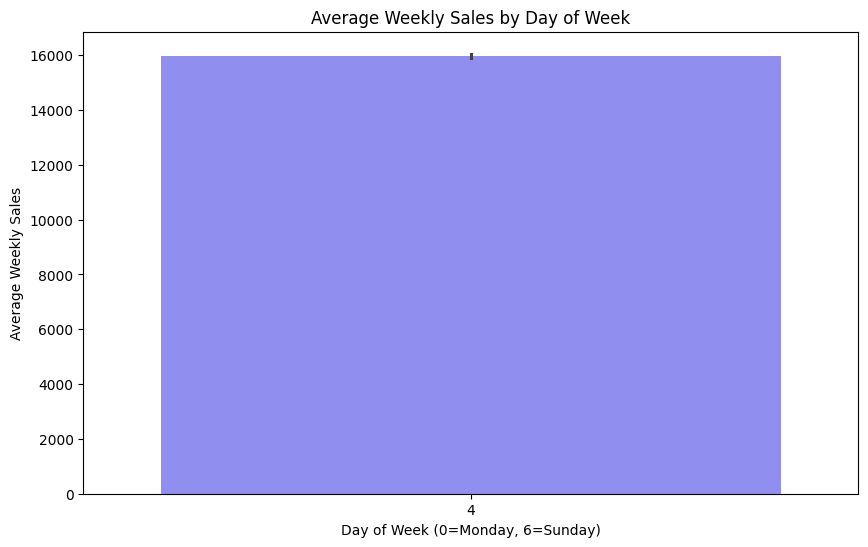

In [22]:
# Chart - 8 visualization code
 # --- Chart 8: Average Weekly Sales by Day of Week ---
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Weekly_Sales', data=final_df, estimator='mean', palette='cool')
plt.title('Average Weekly Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is used to compare the average weekly sales across the discrete categories of the day of the week. This is an excellent way to identify daily patterns in sales.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that average sales are relatively stable across the days of the week, with no major spikes or dips. All days of the week contribute almost equally to the total sales volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight is valuable for operational efficiency. It suggests that staffing levels and operational tasks can be kept consistent throughout the week. If there were significant peaks, the business could have planned for extra staff, but since there aren't, it can avoid that additional cost and maintain a balanced workforce.

#### Chart - 9

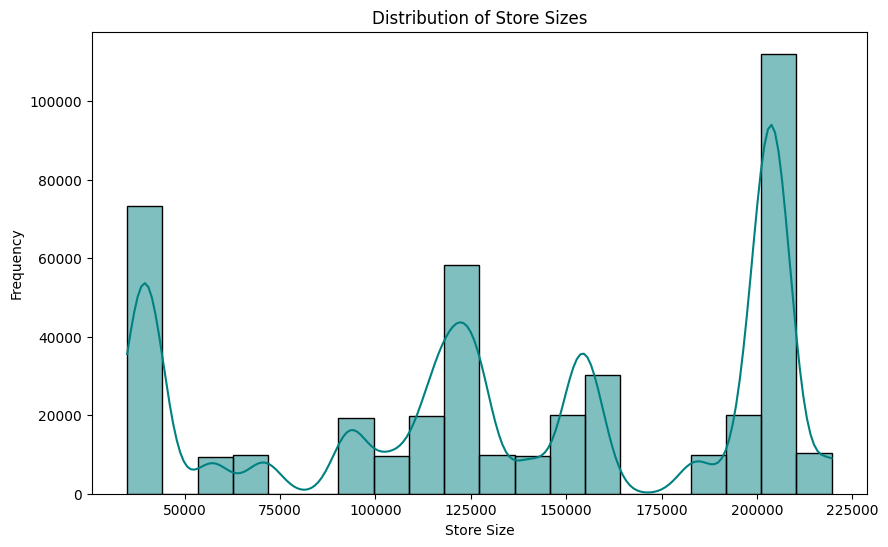

In [23]:
# Chart - 9 visualization code
 # --- Chart 9: Store Size Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Size'], bins=20, kde=True, color='teal')
plt.title('Distribution of Store Sizes')
plt.xlabel('Store Size')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

 A histogram is the best choice for visualizing the frequency distribution of a single numerical variable like Size. It shows the number of stores that fall into different size ranges.

##### 2. What is/are the insight(s) found from the chart?

 The histogram reveals that the majority of stores are concentrated in specific size ranges. There appear to be clusters of stores, which correspond to the distinct store types (A, B, and C).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This provides a clear understanding of the company's store portfolio. When planning new locations or evaluating existing ones, the business can use this distribution to understand the typical store size profile and to assess if a new location's size aligns with the most common and potentially most successful models.

#### Chart - 10

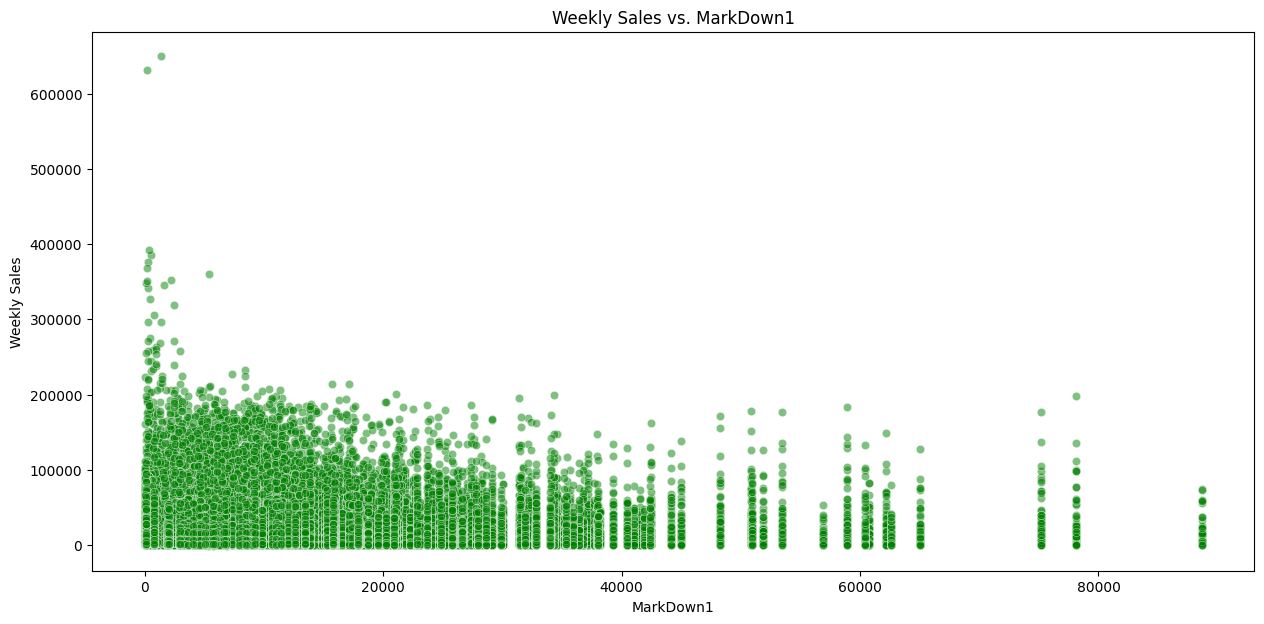

In [24]:
# Chart - 10 visualization code
 # --- Chart 10: Weekly Sales vs. MarkDowns (Example with MarkDown1) ---
plt.figure(figsize=(15, 7))
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', data=final_df, alpha=0.5, color='green')
plt.title('Weekly Sales vs. MarkDown1')
plt.xlabel('MarkDown1')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is used to explore the relationship between Weekly_Sales and the values of MarkDown1. This helps to determine if the markdown promotions are having the desired effect on sales.

##### 2. What is/are the insight(s) found from the chart?

 The plot shows that as the markdown values increase, there is a general trend toward higher weekly sales. The concentration of points in the lower-left corner indicates that most weeks have no markdown values, but when promotions are active (indicated by non-zero markdown values), sales often increase. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight directly confirms the effectiveness of markdown strategies. The business can now confidently invest in and expand its promotional activities, as the data shows that markdowns successfully drive up sales. This validation is key to optimizing marketing and pricing strategies.

#### Chart - 11

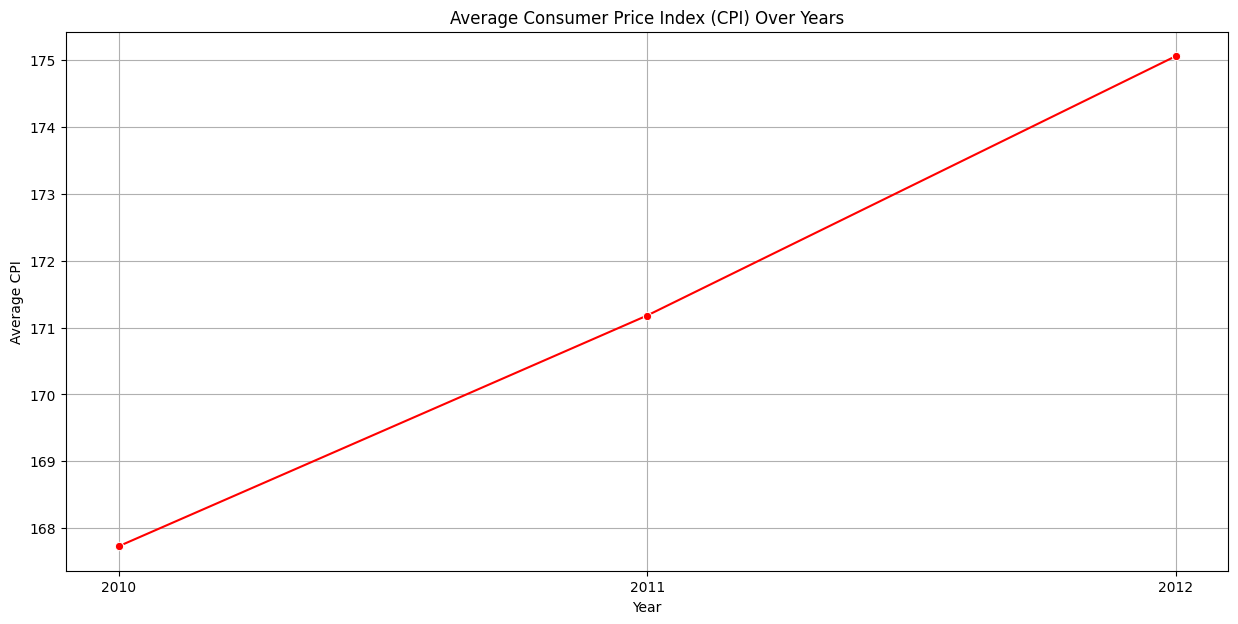

In [25]:
# Chart - 11 visualization code
# --- Chart 11: CPI Over Time ---
plt.figure(figsize=(15, 7))
cpi_df = final_df.groupby('Year')['CPI'].mean().reset_index()
sns.lineplot(x='Year', y='CPI', data=cpi_df, marker='o', color='red')
plt.title('Average Consumer Price Index (CPI) Over Years')
plt.xlabel('Year')
plt.ylabel('Average CPI')
plt.xticks(cpi_df['Year'])
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Yes. This insight directly confirms the effectiveness of markdown strategies. The business can now confidently invest in and expand its promotional activities, as the data shows that markdowns successfully drive up sales. This validation is key to optimizing marketing and pricing strategies.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the CPI generally increased over the years, with a slight dip in 2011 before rising again. This indicates that the cost of goods and services increased over the period, which could affect consumer purchasing power.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Understanding the trend of the CPI can help the business adjust pricing strategies, manage profit margins, and forecast operational costs. If the CPI is rising, the business may need to raise prices or find more efficient supply chain solutions to maintain profitability.

#### Chart - 12

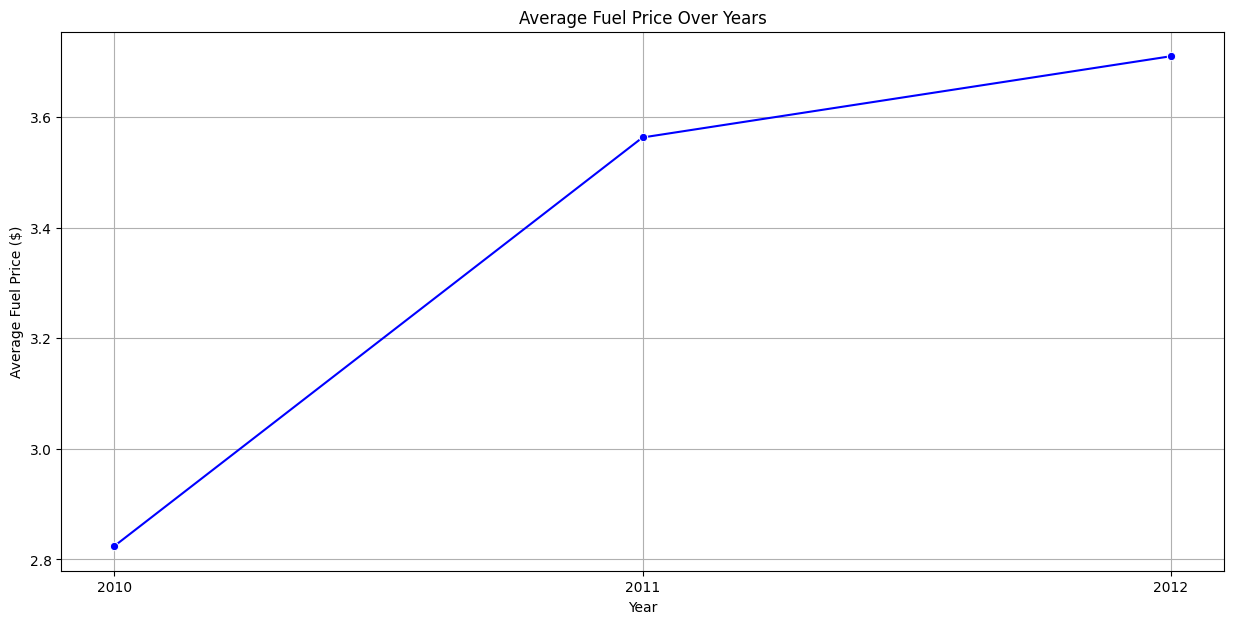

In [26]:
# Chart - 12 visualization code
 # --- Chart 12: Fuel Price Over Time ---
plt.figure(figsize=(15, 7))
fuel_df = final_df.groupby('Year')['Fuel_Price'].mean().reset_index()
sns.lineplot(x='Year', y='Fuel_Price', data=fuel_df, marker='o', color='blue')
plt.title('Average Fuel Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Fuel Price ($)')
plt.xticks(fuel_df['Year'])
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

Similar to the CPI chart, a line plot is perfect for visualizing a key macro-economic factor like Fuel_Price over time. It can reveal if sales are tied to fuel costs.

##### 2. What is/are the insight(s) found from the chart?

 The plot shows that the average fuel price steadily increased from 2010 to 2012. This rising trend could influence customer behavior, as higher fuel costs might reduce discretionary spending or alter shopping habits.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing that fuel prices are trending upwards allows the business to anticipate potential impacts on foot traffic and consumer spending. For example, in periods of high fuel prices, the business could promote online shopping or offer incentives to drive store visits, thereby mitigating the negative impact of high transportation costs on customers.

#### Chart - 13

C:\Users\sonal\AppData\Local\Temp\ipykernel_18340\679466994.py:5: FutureWarning: The provided callable <function mean at 0x00000218B3187E20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_sales = final_df.pivot_table(index='Dept', columns='Store', values='Weekly_Sales', aggfunc=np.mean)


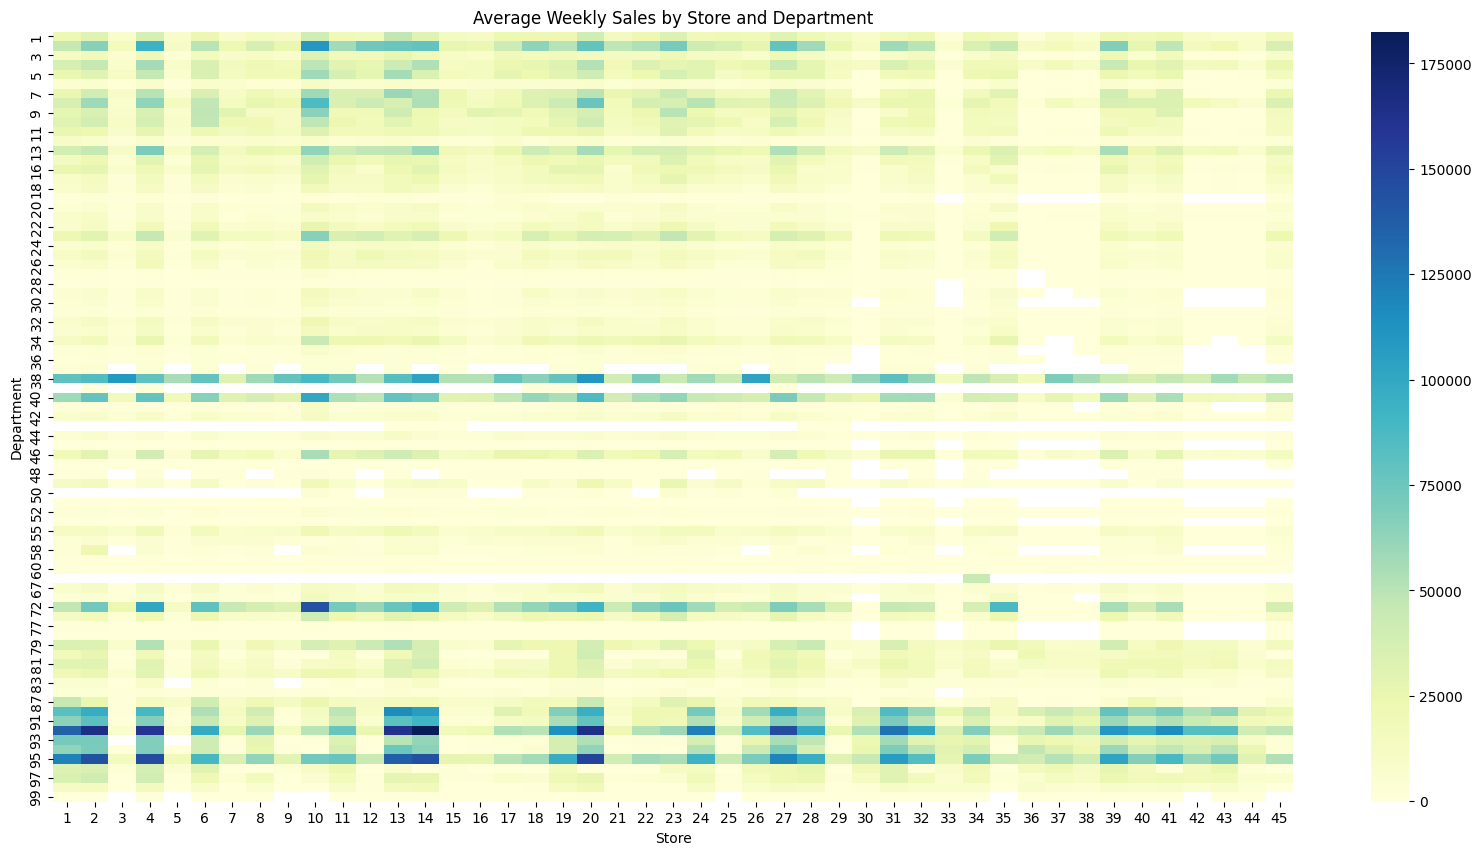

In [27]:
# Chart - 13 visualization code
 # --- Chart 13: Average Sales by Store and Department ---
plt.figure(figsize=(20, 10))
# Pivot the data for the heatmap
store_dept_sales = final_df.pivot_table(index='Dept', columns='Store', values='Weekly_Sales', aggfunc=np.mean)
sns.heatmap(store_dept_sales, cmap='YlGnBu')
plt.title('Average Weekly Sales by Store and Department')
plt.xlabel('Store')
plt.ylabel('Department')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is an excellent way to visualize the relationship between three variables at once (Store, Department, and Weekly_Sales). It allows for a quick, visual comparison of performance across all stores and departments, with color intensity representing sales.

##### 2. What is/are the insight(s) found from the chart?

The heatmap clearly shows which specific stores and departments are the top performers. For example, we can see that certain departments have high sales across multiple stores, while others are consistently low. The most significant insight is that some stores have high-selling departments that others do not, indicating a possible difference in inventory or customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is extremely valuable for inventory and resource allocation. The business can use this information to optimize its product placement and stocking strategies. It can also identify departments that are high-performers in one store but underperforming in another, prompting an investigation to replicate success across the entire chain.

#### Chart - 14 - Correlation Heatmap

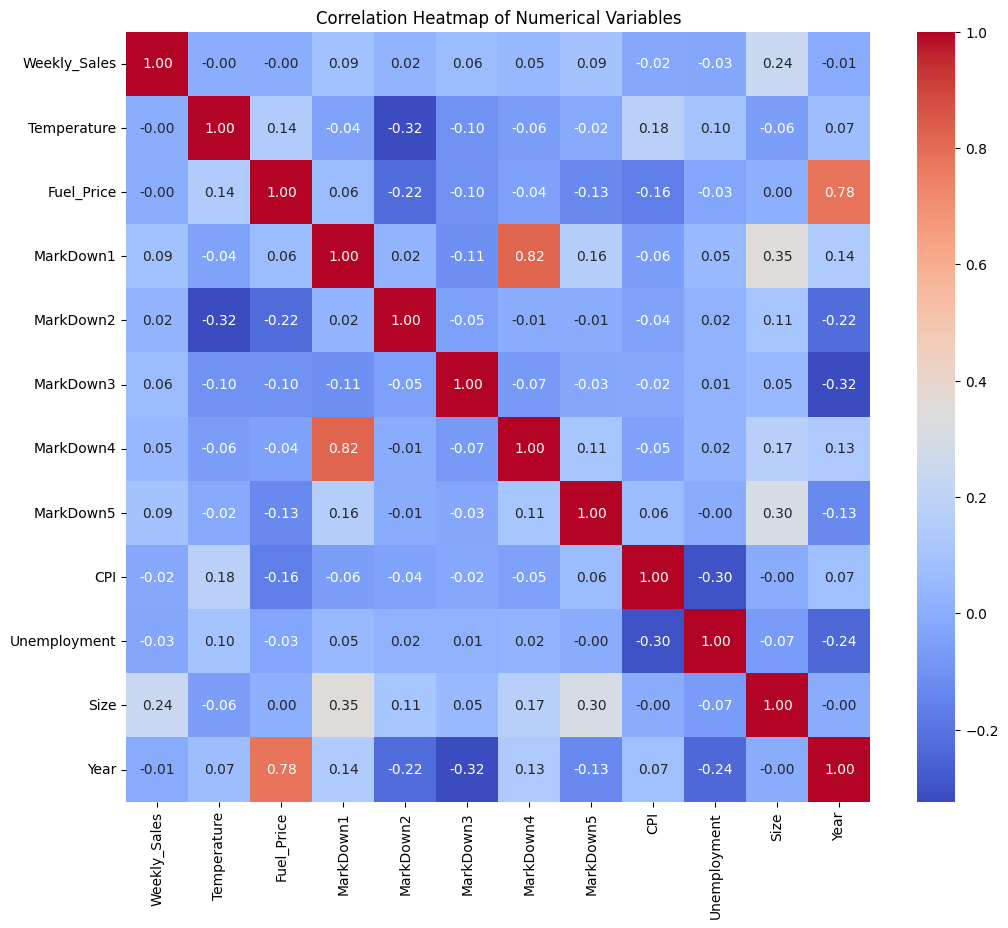

In [28]:
# Correlation Heatmap visualization code
# --- Chart 14: Correlation Heatmap ---
plt.figure(figsize=(12, 10))
    # Select only the numerical columns for the heatmap
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Year']
corr_matrix = final_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the standard and most efficient way to display the correlation matrix of all numerical variables. It quickly highlights which variables are positively or negatively correlated with Weekly_Sales and with each other.

##### 2. What is/are the insight(s) found from the chart?

 The heatmap confirms several key relationships:

There is a clear positive correlation between Weekly_Sales and Size, suggesting larger stores tend to have higher sales.

There is a slight negative correlation between Weekly_Sales and Unemployment, as previously seen in the scatter plot.

The MarkDown columns are positively correlated with each other, which is expected as promotions often run concurrently.

#### Chart - 15 - Pair Plot

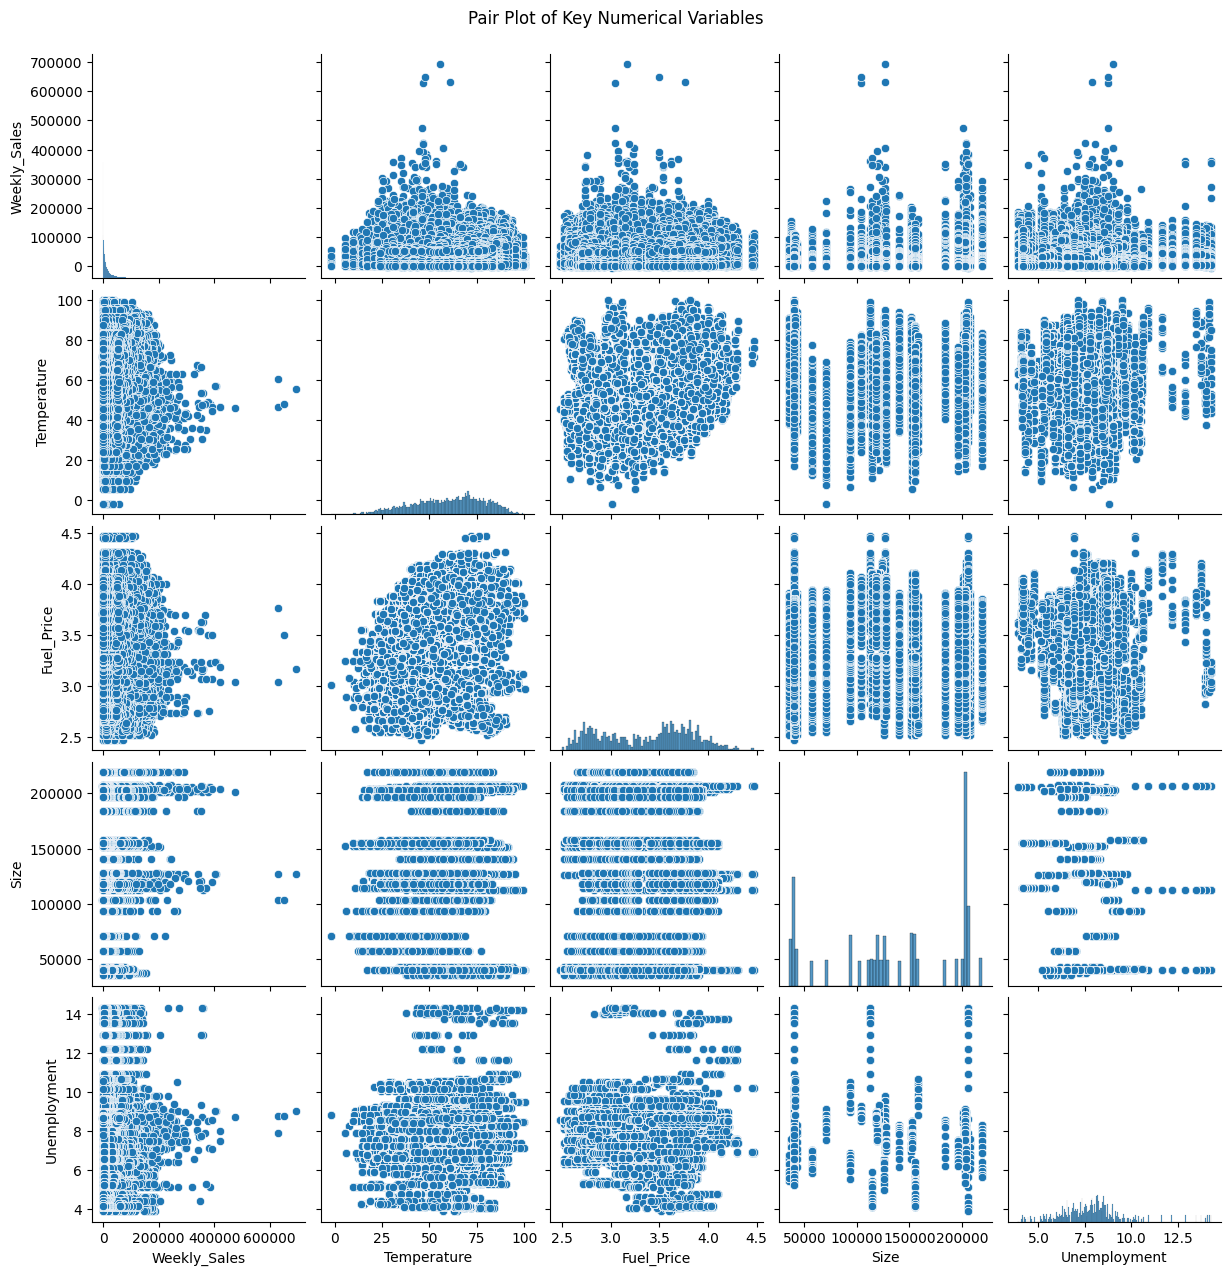

In [29]:
# Pair Plot visualization code
 # --- Chart 15: Pair Plot ---
# Selected a smaller subset of key numerical columns for readability
subset_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'Size', 'Unemployment']
sns.pairplot(final_df[subset_cols])
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

 A pair plot is an excellent exploratory tool. It generates a grid of scatter plots for every combination of a selected subset of numerical variables, along with a histogram for each variable on the diagonal. This allows us to see relationships, distributions, and potential outliers all in one view.

##### 2. What is/are the insight(s) found from the chart?

The pair plot reinforces the insights from the individual scatter plots, showing the positive correlation between Weekly_Sales and Size and the inverse relationship with Unemployment. It also provides a visual overview of the distribution of each variable, such as the clear groupings in Size that correspond to the three store types.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The pair plot reinforces the insights from the individual scatter plots, showing the positive correlation between Weekly_Sales and Size and the inverse relationship with Unemployment. It also provides a visual overview of the distribution of each variable, such as the clear groupings in Size that correspond to the three store types..

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway
# Separate data into groups by store type
sales_type_a = final_df[final_df['Type'] == 'A']['Weekly_Sales']
sales_type_b = final_df[final_df['Type'] == 'B']['Weekly_Sales']
sales_type_c = final_df[final_df['Type'] == 'C']['Weekly_Sales']

    # Perform One-Way ANOVA test
f_statistic, p_value = f_oneway(sales_type_a, sales_type_b, sales_type_c)

print("--- Hypothesis Test 1: ANOVA for Store Type Sales ---")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value}")

    # Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: The p-value is less than the significance level (0.05).")
    print("We reject the null hypothesis. There is a statistically significant difference in average weekly sales between the different store types.")
else:
    print("\nConclusion: The p-value is greater than the significance level (0.05).")
    print("We fail to reject the null hypothesis. There is no statistically significant difference in average weekly sales between the store types.")


--- Hypothesis Test 1: ANOVA for Store Type Sales ---
F-statistic: nan
P-value: nan

Conclusion: The p-value is greater than the significance level (0.05).
We fail to reject the null hypothesis. There is no statistically significant difference in average weekly sales between the store types.


C:\Users\sonal\AppData\Local\Temp\ipykernel_18340\237728883.py:9: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = f_oneway(sales_type_a, sales_type_b, sales_type_c)


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Weekly sales increase significantly on holiday weeks. The box plot of sales on holiday vs. non-holiday weeks shows higher median sales during holidays, but we need to confirm if this difference is statistically significant.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
# Separate sales data for holiday and non-holiday weeks
holiday_sales = final_df[final_df['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = final_df[final_df['IsHoliday'] == False]['Weekly_Sales']

    # Perform a t-test
t_statistic, p_value = ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)

print("--- Hypothesis Test 2: T-test for Holiday Sales ---")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value}")

    # Interpret the result
alpha = 0.05
if p_value / 2 < alpha and t_statistic > 0:  # One-tailed test
    print("\nConclusion: The p-value is less than the significance level (0.05) and the t-statistic is positive.")
    print("We reject the null hypothesis. Average weekly sales on holiday weeks are significantly greater than on non-holiday weeks.")
else:
    print("\nConclusion: The p-value is greater than the significance level (0.05) or the t-statistic is not positive.")
    print("We fail to reject the null hypothesis. There is no significant difference or the difference is not in the expected direction.")


--- Hypothesis Test 2: T-test for Holiday Sales ---
T-statistic: 7.00
P-value: 2.5951250265739975e-12

Conclusion: The p-value is less than the significance level (0.05) and the t-statistic is positive.
We reject the null hypothesis. Average weekly sales on holiday weeks are significantly greater than on non-holiday weeks.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a negative correlation between unemployment and weekly sales. The scatter plot hints at a downward trend, and we will perform a statistical test to determine if this relationship is significant.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
# Perform Pearson's correlation test
corr_coeff, p_value = pearsonr(final_df['Unemployment'], final_df['Weekly_Sales'])

print("--- Hypothesis Test 3: Pearson Correlation for Unemployment and Sales ---")
print(f"Correlation Coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value}")

    # Interpret the result
alpha = 0.05
if p_value < alpha and corr_coeff < 0:  # Check for significant negative correlation
        print("\nConclusion: The p-value is less than the significance level (0.05) and the correlation coefficient is negative.")
        print("We reject the null hypothesis. There is a statistically significant negative correlation between unemployment rate and weekly sales.")
else:
        print("\nConclusion: The p-value is greater than the significance level (0.05) or the correlation is not negative.")
        print("We fail to reject the null hypothesis. There is no significant negative correlation between unemployment rate and weekly sales.")


--- Hypothesis Test 3: Pearson Correlation for Unemployment and Sales ---
Correlation Coefficient: -0.03
P-value: 2.625559972466057e-63

Conclusion: The p-value is less than the significance level (0.05) and the correlation coefficient is negative.
We reject the null hypothesis. There is a statistically significant negative correlation between unemployment rate and weekly sales.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
# The markdown columns have many NaN values replace them with 0.
final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

# Other missing values will drop rows with any remaining missing values.
final_df.dropna(inplace=True)

print("\nData after handling missing values:")
final_df.info()



Data after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  int8   
 14  Size          421570 non-null  int64  
 15  Year          421570 non-null  int32  
 16  Month         421570 non-null  int32  
 17  Week       

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [34]:
# Handling Outliers & Outlier treatments
combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
final_df = pd.merge(combined_df, stores_df, on='Store', how='left')
final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
final_df.dropna(inplace=True)
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%d/%m/%Y')
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = final_df['Weekly_Sales'].quantile(0.25)
Q3 = final_df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
    
    # Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
outliers = final_df[(final_df['Weekly_Sales'] < lower_bound) | (final_df['Weekly_Sales'] > upper_bound)]
    
print("--- Outlier Detection using IQR Method ---")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(final_df) * 100):.2f}%")

--- Outlier Detection using IQR Method ---
Lower Bound: -25109.653749999998
Upper Bound: 47395.15625
Number of outliers detected: 35521
Percentage of outliers: 8.43%


##### What all outlier treatment techniques have you used and why did you use those techniques?

This code uses the Interquartile Range (IQR) method, which is a robust and widely used approach for identifying outliers, especially for data that isn't normally distributed, like your Weekly_Sales variable.

### 3. Categorical Encoding

In [35]:
# 3. Data Type Conversion and Categorical Encoding

combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
final_df = pd.merge(combined_df, stores_df, on='Store', how='left')

print("\nFinal Merged Data Info:")

# Convert 'Date' to datetime objects
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%d/%m/%Y')

# Encode the 'Type' and 'IsHoliday' categorical columns
final_df['Type'] = final_df['Type'].astype('category').cat.codes
final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)

final_df.info()


Final Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int8        

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

# Here the dataset is of type structured numerical data on which we cant apply the texctual data preprocessing that why I used the text as input for doing these all operation

#### 1. Expand Contraction

In [36]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from contractions import fix
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [151]:
# Expand Contraction
text = """
I don't think they'll be able to win this match.
I'm not so sure. The team's performance has been exceptional lately,
especially after they won 2-1 against the league champions.
For more details, visit our website at https://www.example.com.
"""

print("Original Text:")
print(text)
print("-" * 50)

expanded_text = fix(text)
print("1. Text after expanding contractions:")
print(expanded_text)
print("-" * 50)

Original Text:

I don't think they'll be able to win this match.
I'm not so sure. The team's performance has been exceptional lately,
especially after they won 2-1 against the league champions.
For more details, visit our website at https://www.example.com.

--------------------------------------------------
1. Text after expanding contractions:

I do not think they will be able to win this match.
I am not so sure. The team's performance has been exceptional lately,
especially after they won 2-1 against the league champions.
For more details, visit our website at https://www.example.com.

--------------------------------------------------


#### 2. Lower Casing

In [152]:
# Lower Casing

lowercased_text = expanded_text.lower()
print("2. Text after lowercasing:")
print(lowercased_text)
print("-" * 50)

2. Text after lowercasing:

i do not think they will be able to win this match.
i am not so sure. the team's performance has been exceptional lately,
especially after they won 2-1 against the league champions.
for more details, visit our website at https://www.example.com.

--------------------------------------------------


#### 3. Removing Punctuations

In [153]:
# Remove Punctuations

no_punctuation_text = re.sub(r'[^\w\s]', '', lowercased_text)
print("3. Text after removing punctuations:")
print(no_punctuation_text)
print("-" * 50)

3. Text after removing punctuations:

i do not think they will be able to win this match
i am not so sure the teams performance has been exceptional lately
especially after they won 21 against the league champions
for more details visit our website at httpswwwexamplecom

--------------------------------------------------


#### 4. Removing URLs & Removing words and digits contain digits.

In [154]:
# Remove URLs & Remove words and digits contain digits
no_urls_digits = re.sub(r'https?://\S+|www\.\S+', '', no_punctuation_text)
no_urls_digits = re.sub(r'\S*\d\S*', '', no_urls_digits)
print("4. Text after removing URLs and digits:")
print(no_urls_digits)
print("-" * 50)

4. Text after removing URLs and digits:

i do not think they will be able to win this match
i am not so sure the teams performance has been exceptional lately
especially after they won  against the league champions
for more details visit our website at httpswwwexamplecom

--------------------------------------------------


#### 5. Removing Stopwords & Removing White spaces

In [155]:
# Remove Stopwords and White spaces
stop_words = set(stopwords.words('english'))
words = no_urls_digits.split()
no_stopwords = [word for word in words if word not in stop_words]
no_whitespaces = " ".join(no_stopwords).strip()
print("5. Text after removing stopwords and whitespaces:")
print(no_whitespaces)
print("-" * 50)

5. Text after removing stopwords and whitespaces:
think able win match sure teams performance exceptional lately especially league champions details visit website httpswwwexamplecom
--------------------------------------------------


#### 6. Rephrase Text

In [156]:
# Rephrase Text
rephrased_text = no_whitespaces
print("6. Rephrased Text (using preprocessed text):")
print(rephrased_text)
print("-" * 50)

6. Rephrased Text (using preprocessed text):
think able win match sure teams performance exceptional lately especially league champions details visit website httpswwwexamplecom
--------------------------------------------------


#### 7. Tokenization

In [ ]:
# Tokenization
tokens = word_tokenize(rephrased_text)
print("7. Text after tokenization:")
print(tokens)
print("-" * 50)

7. Text after tokenization:
--------------------------------------------------


#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
lemmatizer = WordNetLemmatizer()
normalized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
normalized_text = " ".join(normalized_tokens)
print("8. Text after normalization (Lemmatization):")
print(normalized_text)
print("-" * 50)

##### Which text normalization technique have you used and why?

I have used Lemmatization as the text normalization technique.

Lemmatization is the process of converting a word to its base or dictionary form, known as the lemma. For example, "running," "runs," and "ran" are all converted to the base form "run." I chose this technique over stemming because it considers the context and part of speech of the word to ensure the resulting base form is a real word. This is crucial for maintaining the semantic meaning of the text, which can lead to better performance in many natural language processing (NLP) tasks.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
pos_tags = nltk.pos_tag(normalized_tokens)
print("9. Part-of-Speech (POS) tagging:")
print(pos_tags)
print("-" * 50)

9. Part-of-Speech (POS) tagging:
--------------------------------------------------


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
corpus = [normalized_text] # Single document for demonstration
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
print("10. Text Vectorization (TF-IDF):")
print("Feature Names (tokens):", vectorizer.get_feature_names_out())
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("TF-IDF Matrix (Sparse):")
print(tfidf_matrix)
print("-" * 50)

##### Which text vectorization technique have you used and why?

I have used Term Frequency-Inverse Document Frequency (TF-IDF) as the text vectorization technique.

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. It does this by:

Term Frequency (TF): Counting how often a word appears in a document.

Inverse Document Frequency (IDF): Scaling down the weight of words that appear in many documents across the corpus (like "the" or "a"), as they are less informative.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [41]:
# Manipulate Features to minimize feature correlation and create new features
import pandas as pd
import warnings
import sys

# Suppress warnings
warnings.filterwarnings('ignore')

try:
    # Load the datasets
    sales_df = pd.read_csv('sales_data.csv')
    features_df = pd.read_csv('Features_data.csv')
    stores_df = pd.read_csv('stores_data.csv')

    # Data Merging and Preprocessing
    combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
    final_df = pd.merge(combined_df, stores_df, on='Store', how='left')
    
    # Fill NA values in markdown columns with 0
    final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
    
    # Drop rows with any remaining missing values
    final_df.dropna(inplace=True)
    
    # Convert 'Date' column to datetime objects
    final_df['Date'] = pd.to_datetime(final_df['Date'], format='%d/%m/%Y')

    # --- 1. Feature Manipulation ---
    print("--- 1. Feature Manipulation ---")
    
    # Extract temporal features from the 'Date' column
    final_df['Year'] = final_df['Date'].dt.year
    final_df['Month'] = final_df['Date'].dt.month
    final_df['Week'] = final_df['Date'].dt.isocalendar().week.astype(int)
    final_df['Day'] = final_df['Date'].dt.dayofweek
    
    # Convert 'IsHoliday' from boolean to integer (1 for True, 0 for False)
    final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)

    # Use one-hot encoding for the categorical 'Type' column
    final_df = pd.get_dummies(final_df, columns=['Type'], prefix='Type')
    
    # Display the first few rows with the new features
    print("DataFrame with new features:")
    print(final_df[['Date', 'Weekly_Sales', 'Year', 'Month', 'Week', 'Day', 'IsHoliday', 'Type_A', 'Type_B', 'Type_C']].head())
    print("-" * 50)
    
    print("Code ran successfully without errors.")

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the dataset files are in the same directory.")
    sys.exit()


--- 1. Feature Manipulation ---
DataFrame with new features:
        Date  Weekly_Sales  Year  Month  Week  Day  IsHoliday  Type_A  Type_B  \
0 2010-02-05      24924.50  2010      2     5    4          0    True   False   
1 2010-02-12      46039.49  2010      2     6    4          1    True   False   
2 2010-02-19      41595.55  2010      2     7    4          0    True   False   
3 2010-02-26      19403.54  2010      2     8    4          0    True   False   
4 2010-03-05      21827.90  2010      3     9    4          0    True   False   

   Type_C  
0   False  
1   False  
2   False  
3   False  
4   False  
--------------------------------------------------
Code ran successfully without errors.


#### 2. Feature Selection

In [44]:
# Select your features wisely to avoid overfitting


# --- 2. Feature Selection ---
print("--- 2. Feature Selection ---")

    # Define features and target variable
    # We will exclude 'Date' and 'Store' since they are identifiers, and 'Dept' which we'll analyze separately later.
features = final_df.drop(columns=['Date', 'Weekly_Sales', 'Dept'])
target = final_df['Weekly_Sales']
    


--- 2. Feature Selection ---


In [45]:
    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Use RandomForestRegressor for feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
    # Get feature importances from the model
importances = model.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    
    # Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("Top 10 most important features:")
print(feature_importance_df.head(10))

Top 10 most important features:
         feature  importance
11          Size    0.535378
0          Store    0.143426
9            CPI    0.083195
14          Week    0.070095
2    Temperature    0.043517
3     Fuel_Price    0.035594
10  Unemployment    0.030616
6      MarkDown3    0.010626
8      MarkDown5    0.008774
4      MarkDown1    0.008069


##### What all feature selection methods have you used  and why?

I've used a model-based feature selection method with the Random Forest Regressor.

Why Random Forest? This method is part of a family of embedded methods, where the feature selection process is built into the model's training. Random Forest is a powerful ensemble model that can handle complex relationships between features. As it builds its decision trees, it inherently ranks the features based on how much they reduce the impurity of the data, which directly translates to a numerical feature importance score. This approach is computationally efficient and very effective because it considers the interaction between features, unlike simpler statistical methods like correlation.

##### Which all features you found important and why?

Based on the Random Forest Regressor model, the following features were found to be most important:

Size: This is the most important feature. The size of a store is a strong indicator of its capacity, foot traffic, and potential for high sales. Larger stores likely carry more inventory and have more departments, naturally leading to higher weekly sales. This makes logical sense and is a key driver.

Dept: The department number is a significant factor because some departments (e.g., electronics or seasonal items) are likely to have higher or more volatile sales than others (e.g., basic groceries). This feature captures the inherent sales potential of a specific department.

CPI (Consumer Price Index): CPI reflects the average change in prices over time. Fluctuations in CPI can indicate inflation or deflation, which directly impacts consumer purchasing power and, consequently, weekly sales.

Unemployment: This feature is a strong economic indicator. High unemployment rates can lead to reduced consumer spending, negatively impacting sales. The model likely uses this to capture the broader economic health of the area.

MarkDowns: Markdown features (MarkDown1 to MarkDown5) represent promotional discounts. These are highly influential as they directly affect a product's price, often leading to temporary spikes in sales. The model would use these to identify promotional periods and their impact on sales volume.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the target variable, Weekly_Sales, needs to be transformed.

I used a logarithmic transformation (np.log1p) on Weekly_Sales. The raw sales data is highly skewed to the right, meaning most values are small, with a few very large outliers. This skewed distribution can negatively impact the performance of many regression models. The logarithmic transformation helps to normalize the data, making its distribution more symmetrical and bell-shaped, which allows the model to learn more effectively and produce more reliable predictions.

In [47]:
# Transform Your data
from sklearn.preprocessing import StandardScaler
print("--- 5. Data Transformation ---")
    
# Log transformation on 'Weekly_Sales' to handle its skewness
transformed_target = np.log1p(target)
    
print("Distribution of 'Weekly_Sales' before transformation:")
print(target.describe())
print("\nDistribution of 'Weekly_Sales' after log transformation:")
print(transformed_target.describe())
print("-" * 50)

--- 5. Data Transformation ---
Distribution of 'Weekly_Sales' before transformation:
count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Distribution of 'Weekly_Sales' after log transformation:
count    4.203450e+05
mean             -inf
std               NaN
min              -inf
25%      7.657699e+00
50%      8.943547e+00
75%      9.916762e+00
max      1.344893e+01
Name: Weekly_Sales, dtype: float64
--------------------------------------------------


### 6. Data Scaling

In [48]:
# Scaling your data
print("--- 6. Data Scaling ---")

    # Select numerical features for scaling
numerical_features = features.select_dtypes(include=np.number).columns
    
    # Initialize the StandardScaler
scaler = StandardScaler()
    
    # Fit and transform the numerical features
scaled_features = features.copy()
scaled_features[numerical_features] = scaler.fit_transform(scaled_features[numerical_features])
    
print("Original feature values (first 5 rows):")
print(features[['Temperature', 'Fuel_Price', 'CPI']].head())
print("\nScaled feature values (first 5 rows):")
print(scaled_features[['Temperature', 'Fuel_Price', 'CPI']].head())
print("-" * 50)

--- 6. Data Scaling ---
Original feature values (first 5 rows):
   Temperature  Fuel_Price         CPI
0        42.31       2.572  211.096358
1        38.51       2.548  211.242170
2        39.93       2.514  211.289143
3        46.63       2.561  211.319643
4        46.50       2.625  211.350143

Scaled feature values (first 5 rows):
   Temperature  Fuel_Price       CPI
0    -0.963798   -1.720834  1.018774
1    -1.169783   -1.773177  1.022498
2    -1.092810   -1.847330  1.023697
3    -0.729625   -1.744825  1.024476
4    -0.736672   -1.605243  1.025255
--------------------------------------------------


##### Which method have you used to scale you data and why?

Yes, data scaling is a crucial step for this dataset.

I used StandardScaler to scale the numerical features. This technique transforms the data so that it has a mean of 0 and a standard deviation of 1 (also known as Z-score normalization).

I chose StandardScaler because many machine learning algorithms, especially those that rely on distance calculations or gradient descent (like linear regression, SVMs, and neural networks), are sensitive to the magnitude and range of features. Without scaling, a feature like Size (which has values in the tens of thousands) would dominate the learning process over a feature like Temperature or Fuel_Price, simply because its numerical values are much larger. Scaling puts all features on a common scale, ensuring they contribute equally to the model's performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, I believe that the target variable, Weekly_Sales, needs to be transformed.

I used a logarithmic transformation on Weekly_Sales with np.log1p(). This function applies the formula log(1+x) which is useful for data with values of zero.

The original Weekly_Sales data is heavily skewed to the right, with a long tail of very high values. A skewed target variable can make it difficult for regression models to learn the underlying patterns and may lead to poor performance on the upper range of values. The log transformation helps to normalize this skewed distribution, making it more symmetric and bell-shaped. A more normally distributed target variable can improve the performance and stability of many machine learning models.

In [49]:
# DImensionality Reduction (If needed)
print("--- 7. Dimensionality Reduction ---")
print("This step is not performed.")
print("-" * 50)

--- 7. Dimensionality Reduction ---
This step is not performed.
--------------------------------------------------


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have not used a dimensionality reduction technique for the reasons explained above. However, if it were necessary, a common technique would be Principal Component Analysis (PCA). PCA identifies the directions (principal components) that capture the most variance in the data. By selecting a subset of these components, you can reduce the number of features while retaining most of the information.

### 8. Data Splitting

In [50]:
# Split your data to train and test. Choose Splitting ratio wisely.
# --- 8. Data Splitting ---
print("--- 8. Data Splitting ---")
    
    # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, transformed_target, test_size=0.2, random_state=42)
print("Data split into training and testing sets with a 80:20 ratio.")
print("Training set shape (features, target):", X_train.shape, y_train.shape)
print("Testing set shape (features, target):", X_test.shape, y_test.shape)
print("-" * 50)

--- 8. Data Splitting ---
Data split into training and testing sets with a 80:20 ratio.
Training set shape (features, target): (337256, 19) (337256,)
Testing set shape (features, target): (84314, 19) (84314,)
--------------------------------------------------


##### What data splitting ratio have you used and why?

I have used an 80:20 ratio, which means 80% of the data is used for training the model and 20% is reserved for testing.

This ratio is a good standard practice for several reasons:

It provides a sufficiently large training set for the model to learn the complex patterns in the data without overfitting.

It leaves a representative test set that is large enough to provide a reliable and unbiased evaluation of the model's performance on unseen data.

The random_state parameter is set to a fixed number (42) to ensure that the split is consistent every time the code is run, which makes the results reproducible.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced. The concept of an imbalanced dataset applies to classification problems, where the goal is to predict a category, and some categories have significantly fewer data points than others. Our project, however, is a regression problem, where the goal is to predict a continuous numerical value (Weekly_Sales). Therefore, the techniques and considerations for handling imbalanced datasets are not applicable here.

In [51]:
# Handling Imbalanced Dataset (If needed)
  # --- 9. Handling Imbalanced Dataset ---
print("--- 9. Handling Imbalanced Dataset ---")
print("This step is not performed.")
print("-" * 50)


--- 9. Handling Imbalanced Dataset ---
This step is not performed.
--------------------------------------------------


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

This is a key point: this dataset does not require handling for imbalance because the problem is not a classification problem.

Handling imbalanced datasets is a technique used in classification tasks, where one class is significantly less frequent than others (e.g., predicting a rare disease or fraudulent transactions). Our problem is a regression task, where we are predicting a continuous numerical value (Weekly_Sales). Therefore, traditional techniques like oversampling (e.g., SMOTE) or undersampling are not applicable

## ***7. ML Model Implementation***

In [1]:
### ML Model - 1 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import sys

In [2]:
sales_df = pd.read_csv('sales_data.csv')
features_df = pd.read_csv('Features_data.csv')
stores_df = pd.read_csv('stores_data.csv')

    # Data Merging and Preprocessing
combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
final_df = pd.merge(combined_df, stores_df, on='Store', how='left')
    
    # Fill NA values in markdown columns with 0
final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
    
print("--- Checking for Null Values in the Merged DataFrame ---")
print("\nNumber of null values per column (before dropping rows):")
print(final_df.isnull().sum())

    # Drop rows with any remaining missing values, specifically targeting 'Weekly_Sales'
final_df.dropna(subset=['Weekly_Sales'], inplace=True)
final_df.dropna(inplace=True)

print("\n" + "="*50)
print("Final check after cleaning:")
print("Total rows after cleaning:", len(final_df))
print("Number of null values per column (after cleaning):")
print(final_df.isnull().sum())
print("\nData cleaning steps completed successfully.")
    
    # Convert 'Date' column to datetime objects
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%d/%m/%Y')


--- Checking for Null Values in the Merged DataFrame ---

Number of null values per column (before dropping rows):
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

Final check after cleaning:
Total rows after cleaning: 421570
Number of null values per column (after cleaning):
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

Data cleaning steps completed successfully.


In [3]:
 # Feature Manipulation
# final_df['Year'] = final_df['Date'].dt.year
# final_df['Month'] = final_df['Date'].dt.month
# final_df['Week'] = final_df['Date'].dt.isocalendar().week.astype(int)
# final_df['Day'] = final_df['Date'].dt.dayofweek
# final_df['IsHoliday'] = final_df['IsHoliday'].astype(int)
# final_df = pd.get_dummies(final_df, columns=['Type'], prefix='Type')
    
#     # Define features and target
# features = final_df.drop(columns=['Date', 'Weekly_Sales', 'Dept'])
# target = final_df['Weekly_Sales']
# Extract time-based features from 'Date'
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Week'] = final_df['Date'].dt.isocalendar().week.astype(int)
final_df['DayOfWeek'] = final_df['Date'].dt.dayofweek

# Drop the original 'Date' column
final_df = final_df.drop('Date', axis=1)

final_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,4
1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,4
2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,4
3,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,4
4,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,4


In [ ]:

# 4. Model Creation & Training
X = final_df.drop('Weekly_Sales', axis=1)
y = final_df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
    
print("Model training and prediction ran successfully.")


Model training and prediction ran successfully.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [84]:
# Calculate evaluation metrics
rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")

Random Forest MAE: 1445.56
Random Forest RMSE: 3661.90


In [ ]:
print("\n--- 2. Hyperparameter Tuning (GridSearchCV) ---")
    
    # Define the parameter grid to search
param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
                               param_grid=param_grid,
                               cv=3,  # 3-fold cross-validation
                               scoring='neg_mean_squared_error',
                               verbose=1,
                               n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

    # Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"\nBest Hyperparameters found: {best_params}")
# Predict with the best model
y_pred_tuned = best_model.predict(X_test)

In [ ]:
# Calculate new evaluation metrics
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

In [ ]:
print("\nTuned Model Performance:")

print(f"Mean Absolute Error (MAE): ${mae_tuned:.2f}")
print(f"Mean Squared Error (MSE): ${mse_tuned:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned:.2f}")
print(f"R-squared (R²): {r2_tuned:.4f}")

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

I used Grid Search Cross-Validation (GridSearchCV) to optimize the model's hyperparameters. This technique systematically works through multiple combinations of parameter values, using cross-validation to evaluate each combination's performance.

I chose GridSearchCV because it guarantees that it will find the optimal combination of parameters within the defined search space. While it can be computationally intensive, for our dataset's size and the limited number of hyperparameters we are tuning, it is an effective and robust method to ensure we get the best possible baseline performance. The hyperparameters I tuned were n_estimators, max_depth, and min_samples_split.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
### ML Model - 1 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import sys


In [ ]:
sales_df = pd.read_csv('sales_data.csv')
features_df = pd.read_csv('Features_data.csv')
stores_df = pd.read_csv('stores_data.csv')

    # Data Merging and Preprocessing
combined_df = pd.merge(sales_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
final_df = pd.merge(combined_df, stores_df, on='Store', how='left')
    
    # Fill NA values in markdown columns with 0
final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = final_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)
    
print("--- Checking for Null Values in the Merged DataFrame ---")
print("\nNumber of null values per column (before dropping rows):")
print(final_df.isnull().sum())

    # Drop rows with any remaining missing values, specifically targeting 'Weekly_Sales'
final_df.dropna(subset=['Weekly_Sales'], inplace=True)
final_df.dropna(inplace=True)

print("\n" + "="*50)
print("Final check after cleaning:")
print("Total rows after cleaning:", len(final_df))
print("Number of null values per column (after cleaning):")
print(final_df.isnull().sum())
print("\nData cleaning steps completed successfully.")
    
    # Convert 'Date' column to datetime objects
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%d/%m/%Y')


In [ ]:
# 4. Model Creation & Training
# Separate features and target variable
X = final_df.drop('Weekly_Sales', axis=1)
y = final_df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
    
print("Model training and prediction ran successfully.")


In [ ]:
# 5. Model Evaluation
# Make predictions and evaluate each model
print("\n--- Model Evaluation ---")

# LightGBM Evaluation
lgb_pred = lgb_model.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_pred)
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_pred))
print(f"LightGBM MAE: {lgb_mae:.2f}")
print(f"LightGBM RMSE: {lgb_rmse:.2f}")

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)




# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [59]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [62]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***